# Assessment Project

**Author:** Mark Cotter
**Email:**  g00376335@gmit.ie

This is my jupyter notebook for the GMIT module Machine Learning and Statistics.

***

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set pd df to display all rows. Code adapted from
# https://stackoverflow.com/a/51593236
#pd.set_option('display.max_rows', 500)

### Initial review of data set

***

In [2]:
# import csv file as dataframe.Code adapted from 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
df = pd.read_csv('powerproduction.txt') 

# Descibe basic stats of the data
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The data set contains 500 data point with 2 variables speed and power. The project brief identifies these variables as wind **speed** and wind turbine **power** output. The units of the variables are not mentioned. Based on range of wind speed, the speed units appear to be metres/second (m/s) ranging from no wind (0 m/s) to whole gale force (25 m/s) [2].
Based on the range of power outputs, the power units appear to be in kilowatt-hour (kWh)ranging from 0 kWh to 113.556 kWh [2].

In [3]:
# Display first 5 rows of data
df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


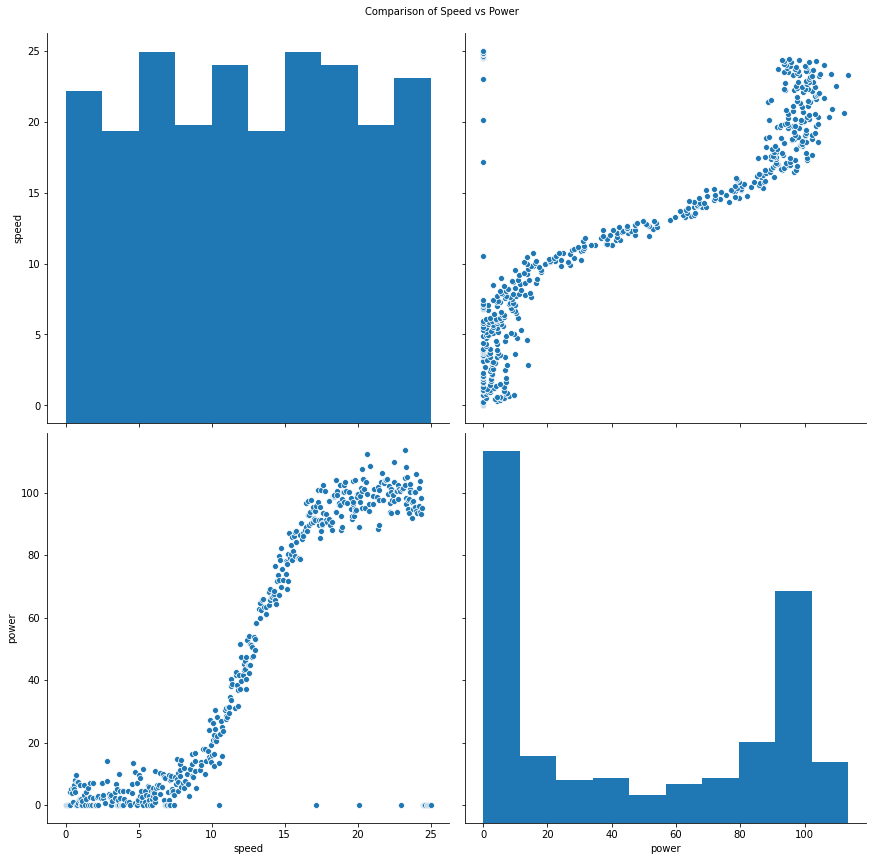

In [4]:
# Plot data comparison Code adpated from
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
plot = sns.pairplot(df, height=6)
# Add Title adapted from https://stackoverflow.com/a/52096280
plt.subplots_adjust(top=0.95)
plt.suptitle("Comparison of Speed vs Power", fontsize = 10)
plt.show()

In [5]:
# Sort data by speed and display top and bottom ranges. Code adapted from
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
df.sort_values(by=['speed']).head(15)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [6]:
df.sort_values(by=['speed']).tail(15)

,speed,power
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223
489,24.399,95.117
490,24.499,0.000
491,24.525,0.000
492,24.575,0.000
493,24.650,0.000
494,24.750,0.000


In [7]:
# Sort data by power and display top and bottom ranges
df.sort_values(by=['power']).head(10)

,speed,power
0,0.000,0.0
111,5.806,0.0
110,5.781,0.0
105,5.556,0.0
89,4.880,0.0
83,4.429,0.0
75,3.879,0.0
74,3.804,0.0
73,3.779,0.0
70,3.679,0.0


In [8]:
df.sort_values(by=['power']).tail(10)

,speed,power
460,23.248,104.655
465,23.373,104.977
481,24.024,105.992
431,21.672,106.208
410,20.295,107.584
464,23.348,108.167
420,20.871,108.485
447,22.497,109.932
416,20.646,112.362
461,23.273,113.556


In [9]:
# Display data points with
df.loc[(df['power'] == 0.000)].sort_values(by=['speed'])

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
15,0.726,0.0
16,0.751,0.0
24,1.026,0.0
26,1.076,0.0
31,1.301,0.0


There appears to be a few outlier data points that have 0.000 kWh power levels. These data points are mostly in the low speed ranges, but also include a few medium and high speeds.

The data shows that power outputs are 0.000 kWh for the 10 data points with speed greater or equal to 24.499 m/s. This speed is considered to be a "whole gale" force on the Beaufort scale that can uprooted trees and cause considerable damage to buildings [2]. This suggests that power generation is stopped for safety reason with the speed is too high (approaching 25 m/s) to avoid damaging the wind turbine [3]. The odd medium speed data point could be an occur when the turbine when shut down for operational and maintenance purpose [2].

For analytic modeling purposes, these 0.000 kWh power data points should be omitted from the dataset review, as they may obscure the relationship between speed and power.

In [10]:
# Remove outlier rows where power == 0.000
df = df.loc[(df['power'] > 0.0)]

# Descibe updated basic stats of the data
df.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


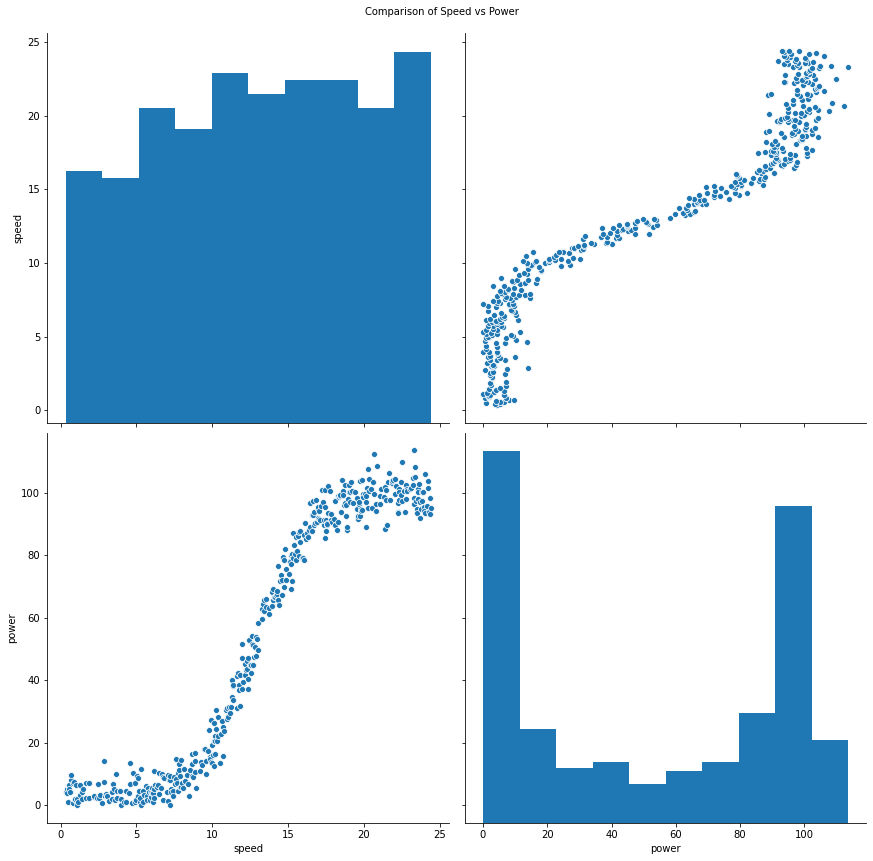

In [11]:
# Replot data comparison Code adpated from
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
plot = sns.pairplot(df, height=6)
# Add Title adapted from https://stackoverflow.com/a/52096280
plt.subplots_adjust(top=0.95)
plt.suptitle("Comparison of Speed vs Power", fontsize = 10)
plt.show()

After the 0 power outliers are removed, the cleaned up data set appears to give a a very defined S-shaped power to speed relationship curve, which also known as a Sigmoid function curve[1]. The speed data point range is almost uniformly distributed. There are much more power data points at the low and high power ranges.

Based on the tables and plots above, wind speed need to be greater than 0.3 m/s to generate power and above 8 m/s before efficiently generating power. This is possible due to friction and resistance losses. The power output plateaus at a speed of approximately 18 m/s and as noted above, the turbine is shut down when wind speed reaches 24.5 m/s.

### Reference

[1] How effectively a Sigmoid function curve can be fitted with a scaled Weibull Cumulative Distribution Function (CDF)?; Dr. Neeraj Dhanraj Bokde - Aarhus University, Denmark; https://towardsdatascience.com/how-effectively-a-sigmoid-function-curve-can-be-fitted-with-a-scaled-weibull-cumulative-6f3a3dd7f19f

[2] Beaufort Wind Scale; Dr. Neal Pettigrew - The University of Maine; http://gyre.umeoce.maine.edu/data/gomoos/buoy/php/variable_description.php?variable=wind_2_speed

[3] Wind energy's frequently asked questions (FAQ) - How efficient are wind turbines? & Why do some of the turbines in a wind farm sometimes stand still? & How is electricity measured?; EWEA; https://www.ewea.org/wind-energy-basics/faq/#:~:text=The%20output%20of%20a%20wind,average%20EU%20households%20with%20electricity.